Best Decision: (0, 0, 0, 0), Maximum Profit: 37.8


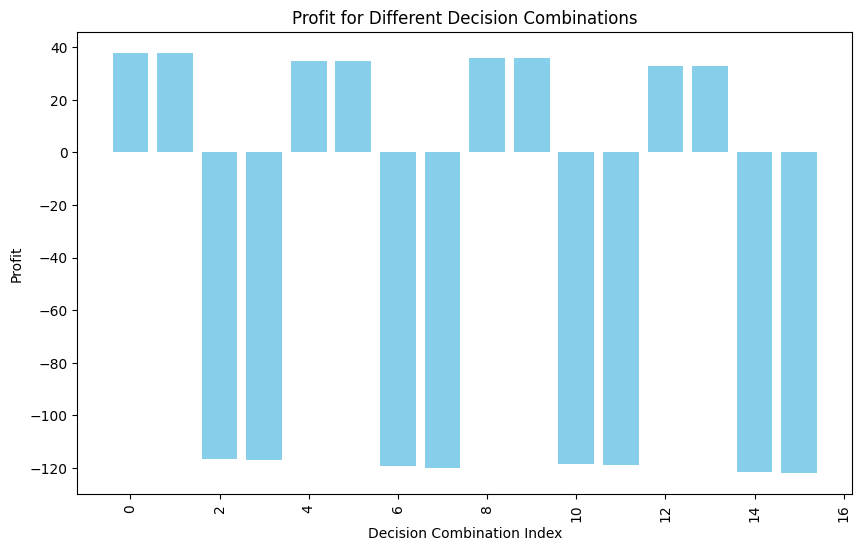

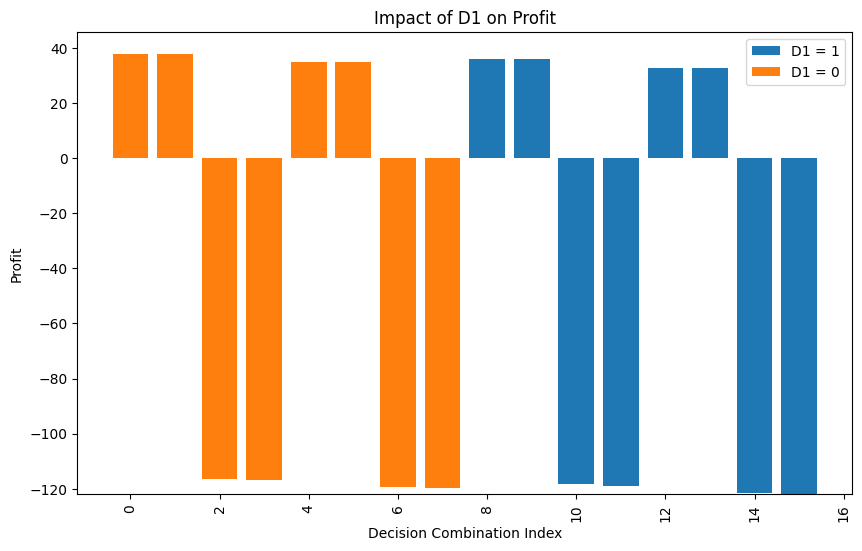

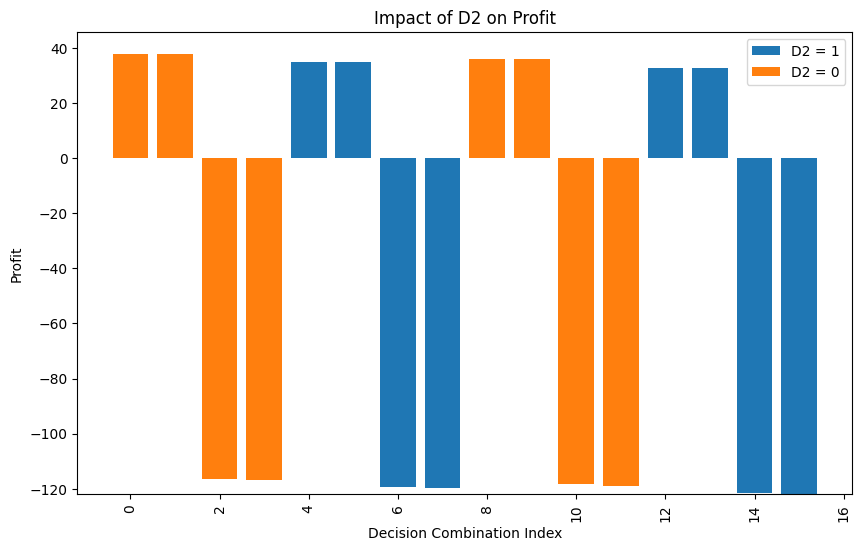

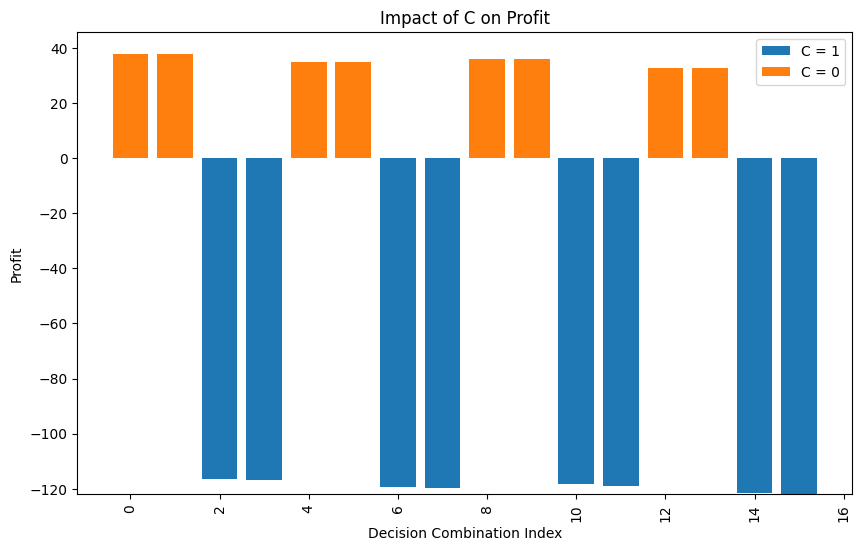

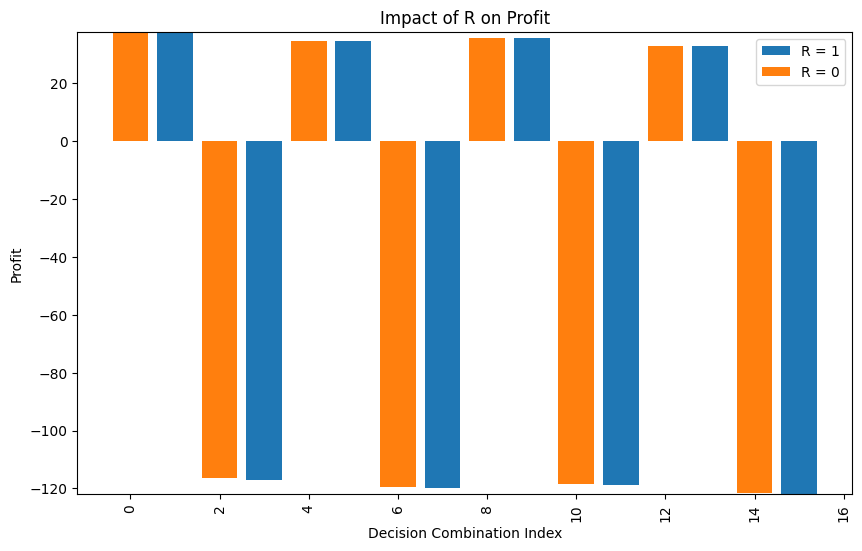

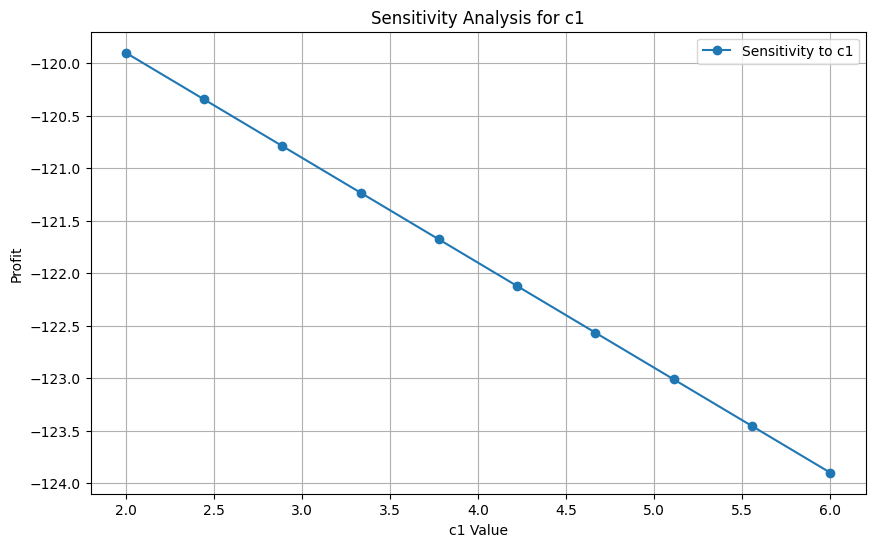

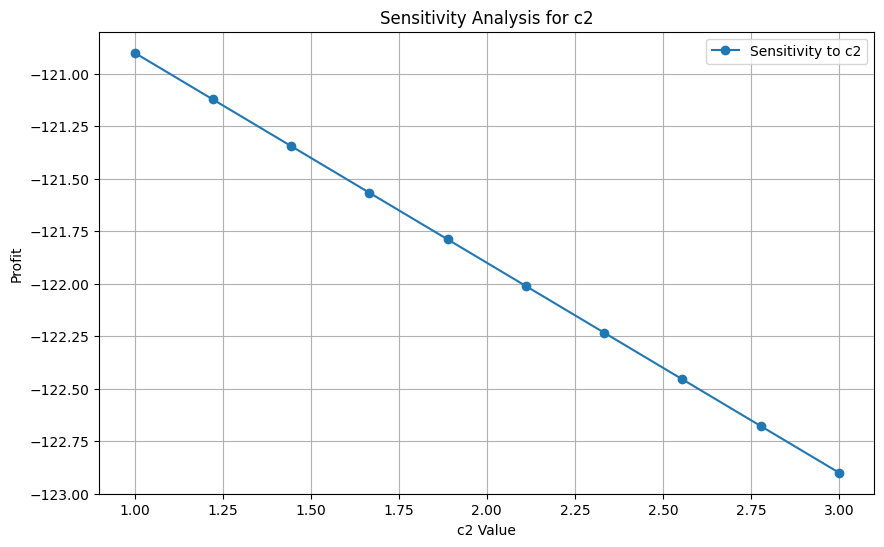

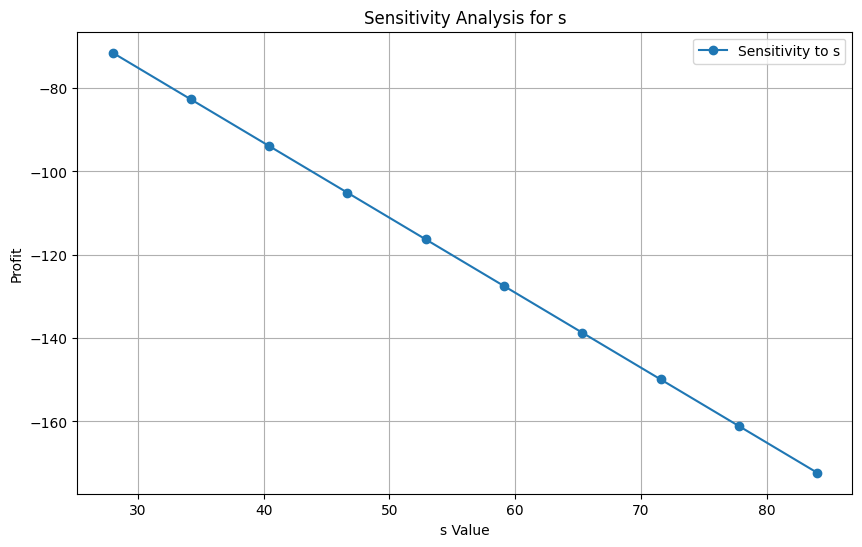

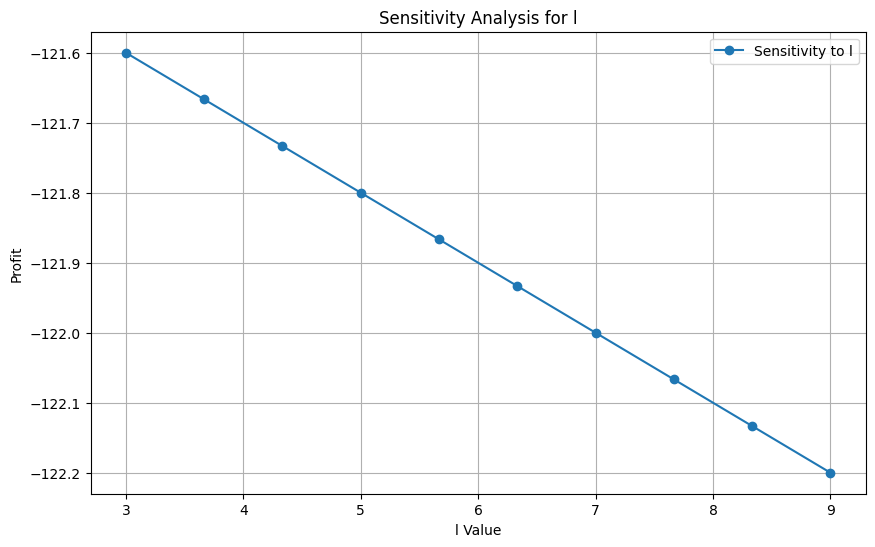

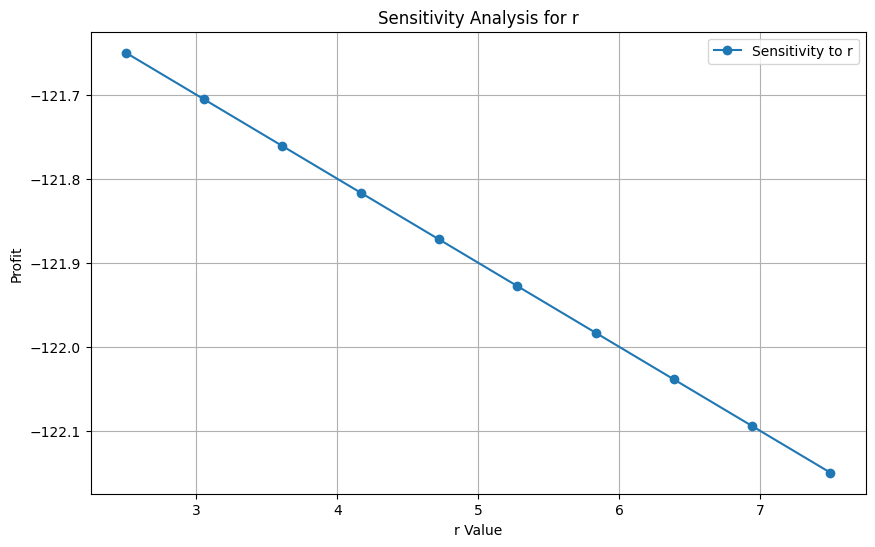

In [3]:

import numpy as np
import pandas as pd

# 参数设定
params = {
    'p1': 0.10, 'p2': 0.10, 'c1': 4, 'c2': 2, 'd1': 2, 'd2': 3,
    'pf': 0.10, 'a': 6, 'df': 3, 's': 56, 'l': 6, 'r': 5
}

# 决策变量
decisions = [0, 1]

# 利润计算函数
def calculate_profit(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    revenue = params['s'] * (1 - params['pf']) * (1 - C * params['df'])
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    profit = revenue - cost_parts - cost_assembly - cost_rework - loss_replacement
    return profit

# 遍历所有可能的决策组合
best_profit = -np.inf
best_decision = None
for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                profit = calculate_profit(D1, D2, C, R, params)
                if profit > best_profit:
                    best_profit = profit
                    best_decision = (D1, D2, C, R)

print(f"Best Decision: {best_decision}, Maximum Profit: {best_profit}")

import numpy as np
import matplotlib.pyplot as plt
import itertools

# 参数设定
params = {
    'p1': 0.10, 'p2': 0.10, 'c1': 4, 'c2': 2, 'd1': 2, 'd2': 3,
    'pf': 0.10, 'a': 6, 'df': 3, 's': 56, 'l': 6, 'r': 5
}

# 决策变量
decisions = [0, 1]

# 利润计算函数
def calculate_profit(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    revenue = params['s'] * (1 - params['pf']) * (1 - C * params['df'])
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    profit = revenue - cost_parts - cost_assembly - cost_rework - loss_replacement
    return profit

# 遍历所有可能的决策组合
profits = []
decision_combinations = list(itertools.product(decisions, repeat=4))
for combo in decision_combinations:
    profit = calculate_profit(*combo, params)
    profits.append(profit)

# 转换为DataFrame以便可视化
df = pd.DataFrame(decision_combinations, columns=['D1', 'D2', 'C', 'R'])
df['Profit'] = profits

# 绘制成本与收益分析图
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Profit'], color='skyblue')
plt.xlabel('Decision Combination Index')
plt.ylabel('Profit')
plt.title('Profit for Different Decision Combinations')
plt.xticks(rotation=90)
plt.show()

# 决策影响图
for i, decision in enumerate(['D1', 'D2', 'C', 'R']):
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['Profit'] * (df[decision] == 1).astype(int), label=f'{decision} = 1')
    plt.bar(df.index, df['Profit'] * (df[decision] == 0).astype(int), bottom=df['Profit'] * (df[decision] == 1).astype(int), label=f'{decision} = 0')
    plt.xlabel('Decision Combination Index')
    plt.ylabel('Profit')
    plt.title(f'Impact of {decision} on Profit')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

# 敏感性分析图
sensitivity_params = ['c1', 'c2', 's', 'l', 'r']
for param in sensitivity_params:
    values = np.linspace(0.5, 1.5, 10) * params[param]
    profits_sensitivity = [calculate_profit(1, 1, 1, 1, {**params, param: value}) for value in values]
    plt.figure(figsize=(10, 6))
    plt.plot(values, profits_sensitivity, marker='o', label=f'Sensitivity to {param}')
    plt.xlabel(f'{param} Value')
    plt.ylabel('Profit')
    plt.title(f'Sensitivity Analysis for {param}')
    plt.legend()
    plt.grid(True)
    plt.show()